# Preparing image thumbnials for the survey

This file csets up the thumbnaisl needed in the survey using the PIL api.

In [1]:
!pip install python-resize-image


In [2]:
import pandas as pd
import numpy as np
import random
from PIL import Image, ImageDraw, ImageFont
from resizeimage import resizeimage
import cv2
from google.colab.patches import cv2_imshow

In [3]:
import nltk
from nltk import tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [133]:
### functions

def get_concat_h(im1, im2):

  """ Function for concateinationg images """

  dst = Image.new('RGB', (im1.width + im2.width, im1.height))
  dst.paste(im1, (0, 0))
  dst.paste(im2, (im1.width, 0))
  return dst



def get_concat_v(im1, im2):

  """ Function for concateinationg images vertically """

  dst = Image.new('RGB', (im1.width, im1.height + im2.height))
  dst.paste(im1, (0, 0))
  dst.paste(im2, (0,im1.height))
  return dst



def split_des_lines(description, split_num: int):

  """ Splitting the description into different lines to fit into the image """

  list_message_2 = []
  spliitted_message_2 = description.split(' ')

  j = 0
  me = ""

  for i,j in enumerate(spliitted_message_2):

    me = me + " " + j

    if (i>0) & ( (i % split_num) == 0):

      list_message_2.append(me)
      me = ""

    if i == len(spliitted_message_2) -1:
      list_message_2.append(me)


  list_message_2 = [i.strip() for i in list_message_2]

  return list_message_2



def optimize(input):

  sbs = tokenize.sent_tokenize(input)
  sbs = sbs[:len(sbs)-1]
  sbs

  sbs_ = ""

  for i in range(len(sbs)):
    sbs_ = sbs_ + " " + sbs[i]


  return sbs_.strip()




In [5]:
def create_airbnb_thumbnail_four_titles_v2(sub_df: pd.DataFrame, split_num: int, ordering_indication: int):

  """ New function to create image with four titles and descriptions!
  This is made to work with the LLaMa-2 generated titles.
  Function to create thumbnail similar to tose on the iarbnb webpage.
  It shall consist of th main listing image as well as two titles and the description

  The ordering_indication allows for creating thumbnails with a differing ordering of the titles:
  Complete random shuffling is not possible since Unipark does not show which image was shown in a loop.
  But for the the first three, second three and last three images shown, aa different ordering can be implemented,
  so that the ordering of the titles on the thumbnail should not affect the survey results!
  """

  des = optimize(sub_df.description)
  list_message_2 = split_des_lines(des, split_num)


  width = 848
  height = 412

  message_1 = "Description:"

  message_text_name = "Title 1:"
  message_text_name_2 = sub_df["name"]

  message_another_text_name_1a = "Title 2:"
  message_another_text_name_1b = sub_df.gen_titles_llama_adapter_v2

  message_another_text_name_2a = "Title 3:"
  message_another_text_name_2b = sub_df.gen_titles_llama_no_peft_v2

  message_another_text_name_3a = "Title 4:"
  message_another_text_name_3b = sub_df.gen_titles_llama_adapter_v2_all


  img_text = Image.new('RGB', (width, height), color='white')

  imgDraw = ImageDraw.Draw(img_text)


  ## drwagin titles - based on ordering


  if ordering_indication == 1:   # true,llama,llama no peft

    imgDraw.text((30, 15), message_text_name, fill=(0, 0, 0),  font=font_type_1)
    imgDraw.text((30, 45), message_text_name_2, fill=(0, 0, 0),  font=font_type_1)

    imgDraw.text((30, 120), message_another_text_name_1a, fill=(0, 0, 0),  font=font_type_1)
    imgDraw.text((30, 150), message_another_text_name_1b, fill=(0, 0, 0),  font=font_type_1)

    imgDraw.text((30, 225), message_another_text_name_2a, fill=(0, 0, 0),  font=font_type_1)
    imgDraw.text((30, 255), message_another_text_name_2b, fill=(0, 0, 0),  font=font_type_1)

    imgDraw.text((30, 330), message_another_text_name_3a, fill=(0, 0, 0),  font=font_type_1)
    imgDraw.text((30, 360), message_another_text_name_3b, fill=(0, 0, 0),  font=font_type_1)


  elif ordering_indication == 2:   ## llama, true, no peft

    imgDraw.text((30, 15), message_text_name, fill=(0, 0, 0),  font=font_type_1)
    imgDraw.text((30, 45), message_another_text_name_1b, fill=(0, 0, 0),  font=font_type_1)

    imgDraw.text((30, 120), message_another_text_name_1a, fill=(0, 0, 0),  font=font_type_1)
    imgDraw.text((30, 150), message_another_text_name_3b, fill=(0, 0, 0),  font=font_type_1)

    imgDraw.text((30, 225), message_another_text_name_2a, fill=(0, 0, 0),  font=font_type_1)
    imgDraw.text((30, 255), message_text_name_2, fill=(0, 0, 0),  font=font_type_1)

    imgDraw.text((30, 330), message_another_text_name_3a, fill=(0, 0, 0),  font=font_type_1)
    imgDraw.text((30, 360), message_another_text_name_2b, fill=(0, 0, 0),  font=font_type_1)


  else: ## no peft, llama, true

    imgDraw.text((30, 15), message_text_name, fill=(0, 0, 0),  font=font_type_1)
    imgDraw.text((30, 45), message_another_text_name_2b, fill=(0, 0, 0),  font=font_type_1)

    imgDraw.text((30, 120), message_another_text_name_1a, fill=(0, 0, 0),  font=font_type_1)
    imgDraw.text((30, 150), message_another_text_name_3b, fill=(0, 0, 0),  font=font_type_1)

    imgDraw.text((30, 225), message_another_text_name_2a, fill=(0, 0, 0),  font=font_type_1)
    imgDraw.text((30, 255), message_another_text_name_1b, fill=(0, 0, 0),  font=font_type_1)

    imgDraw.text((30, 330), message_another_text_name_3a, fill=(0, 0, 0),  font=font_type_1)
    imgDraw.text((30, 360), message_text_name_2, fill=(0, 0, 0),  font=font_type_1)


  ###  loading in the listing main images

  img_current = Image.open(f"/content/gdrive/My Drive/Thesis/Image_data/img_{sub_df.id}.jpg")

  # rezizing that image so that the height fits to the text image
  img = resizeimage.resize_height(img_current, 412)


  ### concatenation
  concat_image_1 = get_concat_h(img, img_text)


  ###### drawing the image 2 with description ####

  width_image_2 = concat_image_1.size[0]
  height_image_2 =   410


  img_text_des = Image.new('RGB', (width_image_2, height_image_2), color='white')

  imgDraw_des = ImageDraw.Draw(img_text_des)


  ### drwaing descriptions

  imgDraw_des.text((30, 25), message_1, fill=(0, 0, 0),  font=font_type_1)

  position = 35

  for i in range(len(list_message_2)):

    position = position + 30
    imgDraw_des.text((30, position), list_message_2[i], fill=(0, 0, 0),  font=font_type_2)


  ### final concatenation


  concat_image = get_concat_v(concat_image_1, img_text_des)


  return concat_image



In [6]:
# connecting to drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [7]:
### loading in fonts to be used in setting up the thumbnails later

#font_type_1 = ImageFont.truetype("/content/gdrive/My Drive/Thesis/arial.ttf", 23)
#font_type_2 = ImageFont.truetype("/content/gdrive/My Drive/Thesis/arial.ttf", 21)

font_type_1 = ImageFont.truetype("/content/gdrive/My Drive/Thesis/arial.ttf", 23)
font_type_2 = ImageFont.truetype("/content/gdrive/My Drive/Thesis/arial.ttf", 23)

## Comparing titles for one listing

In [8]:
## for the descriptions
airbnb_london_filtered_images = pd.read_csv("/content/gdrive/My Drive/Thesis/London_Data/discriminator_tabular_data_images.csv")

In [ ]:
gen_titles_llama_lora_v2 = pd.read_csv("/content/gdrive/My Drive/Thesis/loss_data/gen_titles_llama_v2.csv")

In [15]:
merged_counterfactuals_titles = pd.read_csv("/content/gdrive/My Drive/Thesis/Discriminator_Predictions/merged_counterfactuals_titles.csv")
merged_counterfactuals_titles.columns

Index(['id', 'pred_distilbart', 'proxy', 'pred_pegasus', 'pred_bart',
       'pred_llama_lora', 'pred_llama_adapter', 'pred_llama_no_peft',
       'pred_llama_lora_v2', 'pred_llama_adapter_v2', 'pred_llama_no_peft_v2',
       'name', 'gen_titles_distilbart', 'gen_titles_bart',
       'gen_titles_pegasus', 'gen_titles_llama_lora',
       'gen_titles_llama_adapter', 'gen_titles_llama_no_peft',
       'gen_title_llama_lora_v2', 'gen_titles_llama_no_peft_v2',
       'gen_titles_llama_adapter_v2'],
      dtype='object')

In [34]:
gen_titles_llama_no_peft_v2 = pd.read_csv("/content/gdrive/My Drive/Thesis/loss_data/gen_titles_llama_no_peft_v2.csv")

gen_titles_llama_no_peft_v2#



,id,gen_title
0,19443194,Fulham Broadway Flat
1,14071318,Central London in 20 minutes
2,23847732,Brick Lane Flat
3,38260808,Flat in Edwardian Cul-de-sac
4,9531664,Leyton Tube Station: 17minutes to Central London
...,...,...
995,6704485,Clapham High Street Flat
996,53035936,Versatile Studio Nestled in Private Estate.
997,3305771,Trendy East London Studio Flat
998,34339339,Stratford West Ham Super Bright Flat


In [23]:
##merged_counterfactuals_titles.gen_title_llama_lora_v2 ##==
merged_counterfactuals_titles.gen_titles_llama_no_peft_v2

0                                  Fulham Broadway Flat
1                          Central London in 20 minutes
2                                       Brick Lane Flat
3                          Flat in Edwardian Cul-de-sac
4      Leyton Tube Station: 17minutes to Central London
                             ...                       
992                            Clapham High Street Flat
993         Versatile Studio Nestled in Private Estate.
994                      Trendy East London Studio Flat
995                Stratford West Ham Super Bright Flat
996                                 Flat in East London
Name: gen_titles_llama_no_peft_v2, Length: 997, dtype: object

Merging with the titles generated by the Llama model which was Adapter-tuned on all listings.

In [35]:
titles_all = pd.read_csv("/content/gdrive/My Drive/Thesis/loss_data/gen_titles_llama_adapter_v2_all.csv")
titles_all = titles_all.rename(columns={"gen_title":"gen_titles_llama_adapter_v2_all"})


In [36]:

shape_before = merged_counterfactuals_titles.shape[0]
merged_counterfactuals_titles = pd.merge(merged_counterfactuals_titles, titles_all, how = "inner", on = "id")

assert shape_before == merged_counterfactuals_titles.shape[0]


In [ ]:
# just a quality check:

merged_counterfactuals_titles = merged_counterfactuals_titles[merged_counterfactuals_titles.proxy != 3]
merged_counterfactuals_titles.index = range(merged_counterfactuals_titles.shape[0])

In [ ]:
merged_counterfactuals_titles = merged_counterfactuals_titles[["id", "name", 'gen_titles_llama_adapter_v2','gen_titles_llama_no_peft_v2', 'gen_titles_llama_adapter_v2_all']]


In [ ]:
## merging with dscriptions

merged_counterfactuals_titles_data = pd.merge(merged_counterfactuals_titles, airbnb_london_filtered_images[["id", "description"]], on = "id", how = "left")

In [ ]:
# sampling 500

merged_counterfactuals_titles_data = merged_counterfactuals_titles_data.sample(n = 500)

### Saving images with description, image and 4 titles all in one image.

Also making sure htat the description is of sufficient size and that the space
of the image is enought for long titles and descriptions.

In [ ]:
survey_data_3 = merged_counterfactuals_titles_data[["id", "description", "name", "gen_titles_llama_adapter_v2", "gen_titles_llama_no_peft_v2", "gen_titles_llama_adapter_v2_all"]]
survey_data_3.index  = list(range(survey_data_3.shape[0]))

#survey_data_3.to_csv("/content/gdrive/My Drive/Thesis/survey_data/survey_data_3.csv", index = False)



In [ ]:
#survey_data_3 = pd.read_csv("/content/gdrive/My Drive/Thesis/survey_data/survey_data_3.csv")


In [114]:
survey_data_3.index = list(range(survey_data_3.shape[0]))


third = int(np.floor(survey_data_3.shape[0]/3))
two_third = third * 2

**Importnant consideration:**
As Unipark does not indicate which picture was shown during a radmom sampling, siimple shuffling the titles and saving an ordering per thumbnail is not possible.
Without knowing wwhich thumbnail habs been shown, the quality scores cannot be related to the titles as it is not known thich specififc title (type) they refer to.

As a workaround, 9 listing thumbnaisl will be shown in total with the first 3 listings shown having a certain ordering, the seoncd three havign a differetn on and the last three again having a different one.

Like that, randomization is possible and quality scores can be linked to the type of title!

The input parameter ordering_indication in the function create_airbnb_thumbnail_three_titles takes care of this!


In [ ]:
## kicking out one sample to use as bad sample (see below)

import random

i = np.ceil(random.uniform(0,survey_data_3))
sub_df_bad = survey_data_3.iloc[i,:]

In [ ]:

sub_df_bad

,id,name,gen_titles_llama_adapter_v2,gen_titles_llama_no_peft_v2,description,gen_titles_llama_adapter_v2_all
193,16108307,Double Room Bow Road,Lovely Double Room in Bow Road with 2 Amazing ...,Lovely double room in Bow Road,Hi there! I'm renting my lovely double room in...,Double Room in Bow Road


In [115]:
# kicking out this one datapoint

survey_data_3 = survey_data_3[survey_data_3.id != 16108307]

In [ ]:

### loop to save all images


for i in range(survey_data_3.shape[0]):

  #print(i)

  if i <= third:

    sub_df = survey_data_3.iloc[i,:]

    img_joint = create_airbnb_thumbnail_four_titles_v2(sub_df, 16, 1)
    save_name = f"/content/gdrive/My Drive/Thesis/survey_data/survey_3_1/survey_3_1_img_{str(sub_df.id)}.png"

    img_joint.save(save_name)


  elif (i > third) & (i <= two_third):

    sub_df = survey_data_3.iloc[i,:]

    img_joint = create_airbnb_thumbnail_four_titles_v2(sub_df, 16, 2)
    save_name = f"/content/gdrive/My Drive/Thesis/survey_data/survey_3_2/survey_3_2_img_{str(sub_df.id)}.png"

    img_joint.save(save_name)

  else:

    sub_df = survey_data_3.iloc[i,:]

    img_joint = create_airbnb_thumbnail_four_titles_v2(sub_df, 16, 3)
    save_name = f"/content/gdrive/My Drive/Thesis/survey_data/survey_3_3/survey_3_3_img_{str(sub_df.id)}.png"

    img_joint.save(save_name)




Finally also saving a txt files (per thirds) to store properties on the generated thumbnuals for Unipark

(see Unipark -> Project -< Qeustionnaire Editor -> Loop -> List -> List Elements)


1;1;survey_1_img_51762944.png;;;;;4


For first third:

In [ ]:
import os

all_in  = os.listdir("/content/gdrive/My Drive/Thesis/survey_data/survey_3_1")

In [ ]:
## also saving txt file for unipark !!
survey_data_3.index  = list(range(survey_data_3.shape[0]))

c1, c2, c3, c4, c5, c6, c7, c8 = [], [], [], [], [], [], [], []

for i in range(survey_data_3.shape[0]):

  index = i + 1
  save_name  =  f"survey_3_1_img_{str(survey_data_3.id[i])}.png"

  if save_name in all_in:

    c1.append(index)
    c2.append(index)
    c3.append(save_name)
    c4.append('')
    c5.append('')
    c6.append('')
    c7.append('')
    c8.append(4)



In [ ]:
metadata_3_1 = pd.DataFrame({"c1":c1, "c2":c2, "c3":c3, "c4":c4, "c5":c5, "c6":c6, "c7":c7, "c8":c8})

In [ ]:
metadata_3_1.to_csv('/content/gdrive/My Drive/Thesis/survey_data/metadata_3_1.txt', sep=';', index = False)

For the second third:

In [ ]:

all_in  = os.listdir("/content/gdrive/My Drive/Thesis/survey_data/survey_3_2")

In [ ]:

c1, c2, c3, c4, c5, c6, c7, c8 = [], [], [], [], [], [], [], []

for i in range(survey_data_3.shape[0]):

  index = i + 1
  save_name  =  f"survey_3_2_img_{str(survey_data_3.id[i])}.png"

  if save_name in all_in:

    c1.append(index)
    c2.append(index)
    c3.append(save_name)
    c4.append('')
    c5.append('')
    c6.append('')
    c7.append('')
    c8.append(4)



In [ ]:
metadata_3_2 = pd.DataFrame({"c1":c1, "c2":c2, "c3":c3, "c4":c4, "c5":c5, "c6":c6, "c7":c7, "c8":c8})

In [ ]:
metadata_3_2.to_csv('/content/gdrive/My Drive/Thesis/survey_data/metadata_3_2.txt', sep=';', index = False)

For the final third:

In [ ]:

all_in  = os.listdir("/content/gdrive/My Drive/Thesis/survey_data/survey_3_3")

In [ ]:

c1, c2, c3, c4, c5, c6, c7, c8 = [], [], [], [], [], [], [], []

for i in range(survey_data_3.shape[0]):

  index = i + 1
  save_name  =  f"survey_3_3_img_{str(survey_data_3.id[i])}.png"

  if save_name in all_in:

    c1.append(index)
    c2.append(index)
    c3.append(save_name)
    c4.append('')
    c5.append('')
    c6.append('')
    c7.append('')
    c8.append(4)



In [ ]:
metadata_3_3 = pd.DataFrame({"c1":c1, "c2":c2, "c3":c3, "c4":c4, "c5":c5, "c6":c6, "c7":c7, "c8":c8})

In [ ]:
metadata_3_3.to_csv('/content/gdrive/My Drive/Thesis/survey_data/metadata_3_3.txt', sep=';', index = False)

### A very bad example


In [ ]:


sub_df_bad

id                                                                          16108307
name                                                            Double Room Bow Road
gen_titles_llama_adapter_v2        Lovely Double Room in Bow Road with 2 Amazing ...
gen_titles_llama_no_peft_v2                           Lovely double room in Bow Road
description                        Hi there! I'm renting my lovely double room in...
gen_titles_llama_adapter_v2_all                              Double Room in Bow Road
Name: 305, dtype: object

In [ ]:


sub_df_bad['name'] = "No smoking!"
sub_df_bad.gen_titles_llama_adapter_v2_all = "Very small room..."
sub_df_bad.gen_titles_llama_adapter_v2  = " Lovely Double Room in Bow Road with 2 Amazing Flatmates"

<ipython-input-121-af8f652db282>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_bad['name'] = "No smoking!"
<ipython-input-121-af8f652db282>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_bad.gen_titles_llama_adapter_v2_all = "Very small room..."
<ipython-input-121-af8f652db282>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_bad.gen_titles_llama_adapter_v2  = " Lovely Double Room in Bow Road with 2 Amazing Fl

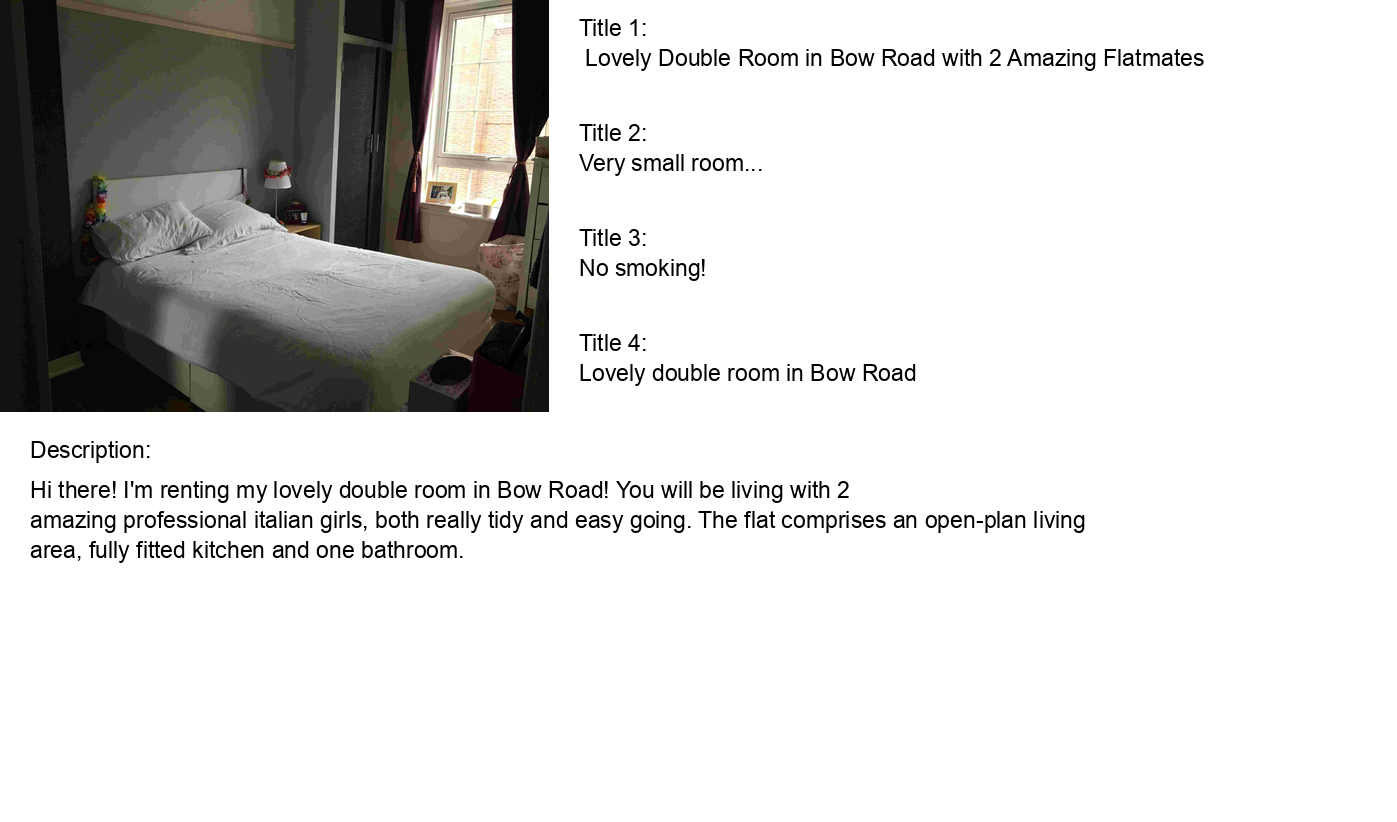

In [ ]:

img_joint = create_airbnb_thumbnail_four_titles_v2(sub_df_bad, 16, 2)

## and saving
save_name = "/content/gdrive/My Drive/Thesis/survey_data/bad_image.png"
img_joint.save(save_name)

img_joint
